# Trevor Snedden Assignment 4

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random as random
%matplotlib inline

### plot def

In [2]:
def plotLabels():
    plt.title('Fish length per age')
    plt.xlabel('Fish Age')
    plt.ylabel('Length of Bluegill fish in mm')

def plotFish(age, length):
    age = np.array(age)
    length = np.array(length)

    #plot
    plt.plot(age, length, 'bo', label = 'Fish weight per age')
    plotLabels()
    plt.show()
    
    


#### Fish values
* x = age
* y = length

In [3]:
def extract_data(file):
    age, length = [],[]
    with open(file, 'r') as file:
        for line in file.readlines():
            a, l = line.split()
            try: # to skip over the initial txt
                age.append(float(a)),
                length.append(float(l)) #convert to float since it was txt
            except:
                continue
    return age, length
        #print(age, length)
        #return age, length

#extract_data('fish.txt')


In [4]:
'''stack, sort values, and separated for regression line.'''
xVal, yVal = extract_data('fish.txt')

vals = np.column_stack((xVal,yVal)) #combine into 2darry

vals = vals[vals[:,0].argsort()] #sort by age
#print(vals)
xVal = vals[:,0] # seperate back into x/y axis's
yVal = vals[:,1] # 

#print(xVal)
#print(yVal)

# Problem 1

1. Plot the fish.txt file. 
    * length in mm = y
    * age of fish in years = x

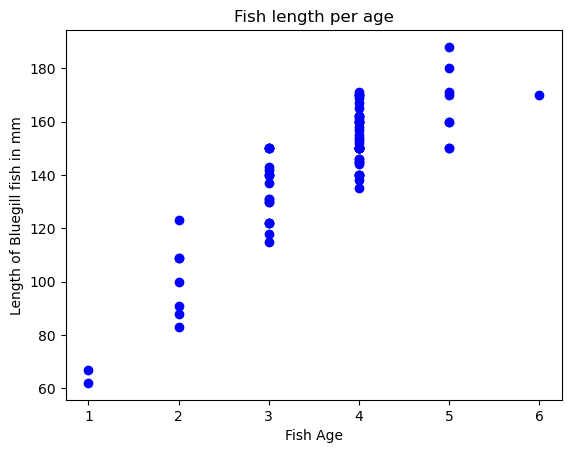

In [5]:
#Plot fish
plotFish(xVal, yVal)

# Problem 2:
1. How is the length of the a bluegill fish(dependent var) related to is age (indepenent var)?
3. Three models needed using polyfit function.
    * line model
    * perabela
    * cubic model 
4. comput the R-Squared value for all 3 models
5. plot with blue dots and colored lines

6. legends w/info of regression models and R-square value

### Regression line model
 * y = ax + b
 * degree 1; best fit/2 floating points
 

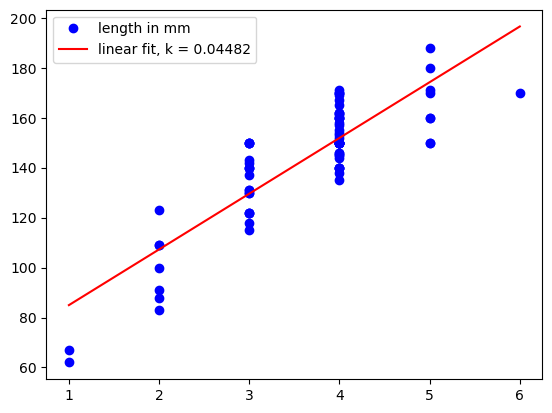

[22.31229429 62.64898354]


In [6]:
def linearfit():
    # xVal, yVal = extract_data(file)
    # xVal = np.array(xVal)
    # yVal = np.array(yVal)

    plt.plot(xVal, yVal, 'bo', label = 'length in mm')
    fit = np.polyfit(xVal, yVal, 1) # tuple with 1 being best line
    regress_line = fit[0]*xVal + fit[1] 
    plt.plot(xVal, regress_line, 'r', label = 'linear fit, k = ' + str(round(1/fit[0], 5)))
    plt.legend(loc='best')
    plotLabels
    plt.show()
    print(fit[:])
linearfit()



### parabola
* quadratic equation; y= ax**2 + bx + c 
* a = slope and b is y_int
* polyval generates the point associated with cubic fit
* to find the cubic fit
    1. fit = np.polyfit(xVal , yVal, deg.)
    1. predict_vals = np.polyval(fit, xVal)
    1. plt.plot(xVal, predicted)

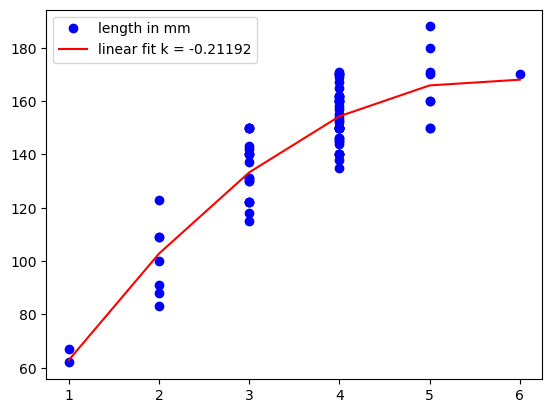

In [7]:
def parabola():
    plt.plot(xVal, yVal, 'bo', label = 'length in mm')
    #cubic fit with polyval
    fit = np.polyfit(xVal, yVal,2) # tuple with 1 being best line
    predicted_vals = np.polyval(fit, xVal)
    #plot
    plt.plot(xVal, predicted_vals, 'r', label = 'linear fit k = '\
             + str(round(1/fit[0],5)))
    plt.legend(loc='best')
    plotLabels
    plt.show()

parabola()


ridding data at age 1 and age 6 might be appropriate

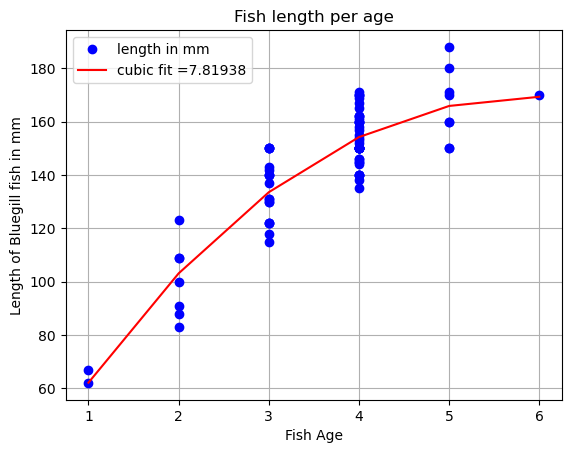

[ 62.09581647  62.09581647 103.07734577 103.07734577 103.07734577
 103.07734577 103.07734577 103.07734577 103.07734577 133.52199942
 133.52199942 133.52199942 133.52199942 133.52199942 133.52199942
 133.52199942 133.52199942 133.52199942 133.52199942 133.52199942
 133.52199942 133.52199942 133.52199942 133.52199942 133.52199942
 133.52199942 133.52199942 133.52199942 154.19710198 154.19710198
 154.19710198 154.19710198 154.19710198 154.19710198 154.19710198
 154.19710198 154.19710198 154.19710198 154.19710198 154.19710198
 154.19710198 154.19710198 154.19710198 154.19710198 154.19710198
 154.19710198 154.19710198 154.19710198 154.19710198 154.19710198
 154.19710198 154.19710198 154.19710198 154.19710198 154.19710198
 154.19710198 154.19710198 154.19710198 154.19710198 154.19710198
 154.19710198 154.19710198 154.19710198 154.19710198 154.19710198
 154.19710198 154.19710198 154.19710198 154.19710198 165.86997804
 165.86997804 165.86997804 165.86997804 165.86997804 165.86997804
 165.86997

In [8]:
def cubic_fit():
    plt.plot(xVal, yVal, 'bo', label = 'length in mm')
    #cubic fit with polyval
    fit = np.polyfit(xVal, yVal,3) # 
    predicted_vals = np.polyval(fit, xVal) #gen points associated w/cubic fit
    #plot
    plt.plot(xVal, predicted_vals, 'r', label = 'cubic fit ='\
            + str(round(1/fit[0],5)))
    plt.legend(loc='best')
    plotLabels()
    plt.grid(True)
    plt.show()
    print(predicted_vals)

cubic_fit()


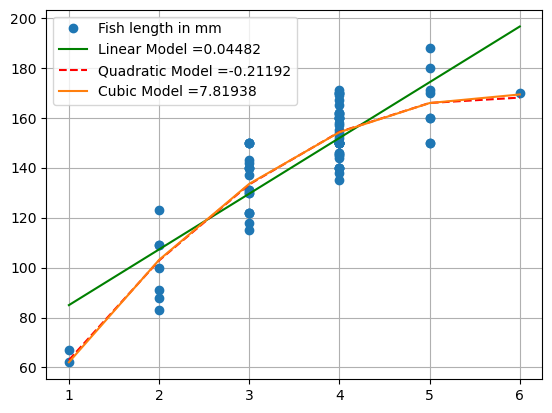

In [9]:
plt.plot(xVal, yVal, 'o', label = 'Fish length in mm')

model1 = np.polyfit(xVal, yVal, 1)
regress_line = model1[0]*xVal + model1[1]
plt.plot(xVal, regress_line, 'g-', label = 'Linear Model ='\
        + str(round(1/model1[0], 5)))

model2 = np.polyfit(xVal, yVal,2)
plt.plot(xVal, np.polyval(model2, xVal), 'r--', label = 'Quadratic Model ='\
        + str(round(1/model2[0],5)))

model3 = np.polyfit(xVal, yVal,3)
plt.plot(xVal, np.polyval(model3,xVal), label = 'Cubic Model ='\
         + str(round(1/model3[0],5)))
plt.legend(loc='best')
plt.grid(True)
plt.show()

## goodness testing
* coefficient of determination
* 0 = no relationship
    * 1 = relationship

In [10]:
def aveMeanSquareError(data, predicted):
    '''is used in the linear regression, intending to minimize the errors between the predict, the values and the mer the values for the dependent Variable. for each error between predicted and data, add all squared errors and use as measures to predict how accurate. if 0, predicted values are perfect'''
    error = 0.0
    for i in range(len(data)):
        error += (data[i] - predicted[i])**2
    return error/len(data)

#compare fits for fish data
estYvals = np.polyval(model1, xVal)
print('Avg mean square error for linear model = ', aveMeanSquareError(yVal, estYvals))
estYvals = np.polyval(model2, xVal)
print('Avg mean square error for linear model = ', aveMeanSquareError(yVal, estYvals))
estYvals = np.polyval(model3, xVal)
print('Avg mean square error for linear model = ', aveMeanSquareError(yVal, estYvals))

Avg mean square error for linear model =  152.47226648794896
Avg mean square error for linear model =  114.36789171210624
Avg mean square error for linear model =  114.30392579532992


#### Rsquared

In [11]:
def rSquared(observed, predicted):
    error = ((predicted - observed)**2).sum()
    meanError = error/len(observed)
    return 1 - (meanError/np.var(observed))

In [12]:
def genFits(xVal, yVal, degree): #generate multiple models
    models = []
    for d in degree:
        model = np.polyfit(xVal, yVal, d) #generate linear regression model
        models.append(model)
    return models

def testFits(models, degrees, xVal, yVal, title): #evaluate using Rsquared values
    plt.plot(xVal, yVal, 'o', label = title)
    for i in range(len(models)): #for each model
        estYval = np.polyval(models[i], xVal) #applies the fit model
        error = rSquared(yVal, estYval)
        plt.plot(xVal, estYval, label = 'Model Fit of degree '\
                 + str(degrees[i]) + ', R2 = '\
                 + str(round(error,5)))
    plt.grid(True)
    plotLabels()
    plt.legend(loc= 'best')
    plt.title(title)
    plt.show()

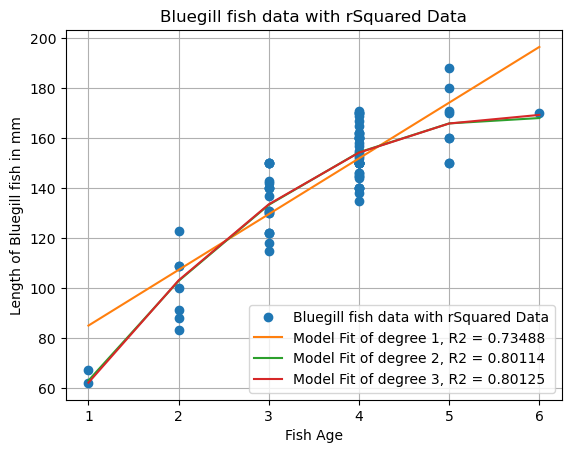

In [13]:
degrees = (1,2,3)
models = genFits(xVal, yVal, degrees)
testFits(models, degrees, xVal, yVal, 'Bluegill fish data with rSquared Data')

##### Answer
* model 3 with degree 3 currently appears to be the best fit according to the rSquare. The visually, these don't appear to be the best models to represend the data as the fish age 1 and 6 have limited data points, not accurately depicting the fish's age. 

#### Problem 3 
* Random 5 year old fish length


In [1]:
yr_5_fish = []

fit = np.polyfit(xVal, yVal,3) # chosen from problem 2 model eval
predicted_vals = np.polyval(fit, xVal)
for f in range(len(xVal)):
    if xVal[f] == 5:
        yr_5_fish.append(predicted_vals[f])

random_fish_length = random.choice(yr_5_fish)
print(f'According to the predicted values, a randomly selected 5 year old fish could be {round(random_fish_length,2)}mm long')


NameError: name 'np' is not defined

Answer 3 
According to the predicted values, a randomly selected 5 year old fish could be 165.87mm long

### Problem 4
* Cross Validate
    1. generate models using one dataset and then test them on another

Answer:
The best fit model for this data is the linear fit model 1. This reflects that as the fish ages, the fish's length increases linearly. There isn't enough data for fish at age 1 or 6 to determine that fish's growth isn't linear.

In [16]:

numSubsets = 10 # do it x times
dimensions = (1,2,3,4) # polynomials
rSquares = {}
for d in dimensions:
    rSquares[d] = []  #for each of the 10 times, it creates a list to avg all

In [17]:
def splitData(xVals, yVals):
    toTrian = random.sample(range(len(xVals)),
                            len(xVals)//2) #choose half of the values
    trainX, trainY, testX, testY = [],[],[],[]  #test data point and training data points
    for i in range(len(xVals)): # for all index values
        if i in toTrian:
            trainX.append(xVals[i])
            trainY.append(yVals[i])
        else:
            testX.append(xVals[i])
            testY.append(yVals[i])
    return trainX, trainY, testX, testY

For dimensionality 1 mean = 0.5763 std = 0.2764
For dimensionality 2 mean = 0.6668 std = 0.1739
For dimensionality 3 mean = 0.6392 std = 0.1946
For dimensionality 4 mean = 0.5772 std = 0.3326
2
[0.5763, 0.6668, 0.6392, 0.5772]


c:\Users\snedd\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3457: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)


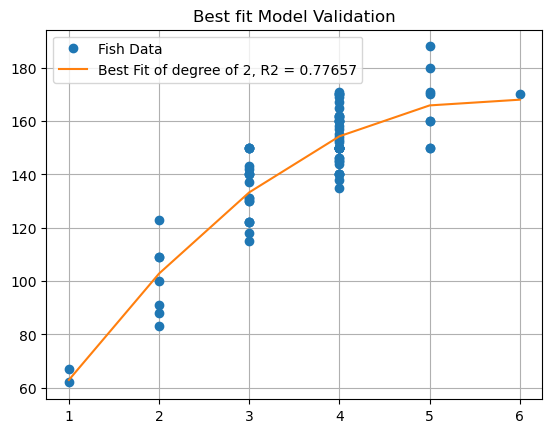

In [18]:
# train, test, report

y_estiments = []
for f in range(numSubsets):
    '''10 rsquare values for each degree'''
    trainX, trainY, testX, testY = splitData(xVal, yVal)
    for d in dimensions:
        model = np.polyfit(trainX, trainY, d) # model for each degree
        estYvals = np.polyval(model, testX)
        rSquares[d].append(rSquared(testY, estYvals)) #applies the rsquared function
        error = rSquared(testY, estYvals)
        y_estiments.append(estYvals)


means = []
for d in dimensions: # average each rsquared value
    mean = round(sum(rSquares[d])/len(rSquares[d]),4) #check the Rsquare model
    means.append(mean)
    sd = round(np.std(rSquares[d]),4)
    print('For dimensionality', d, 'mean =', mean, 'std =', sd)

print(np.argmax(means)+1)
print(means)
best_rSquare = (np.argmax(means)+1)
plt.plot(xVal, yVal, 'o', label = "Fish Data")
model = np.polyfit(xVal, yVal, best_rSquare) #best fit according to test models
estYvals = np.polyval(model, xVal)
plt.plot(xVal, estYvals, label = 'Best Fit of degree of '\
        + str(best_rSquare) + ', R2 = '\
        + str(round(error,5)))

plt.grid(True)
plt.legend(loc = 'best')
plt.title('Best fit Model Validation')
plt.show()

#print(min(rSquares, key=rSquares.get)+1) # rsquare index 1 is best fit

# Problem 5
* Utilize Root Mean Square Error inplace of R-Square

For dimensionality 1 mean = 7.2837 std = 6.7251
For dimensionality 2 mean = 6.137 std = 5.4838
For dimensionality 3 mean = 6.448 std = 5.8535
For dimensionality 4 mean = 8.1614 std = 7.9701
4
[7.2837, 6.137, 6.448, 8.1614]


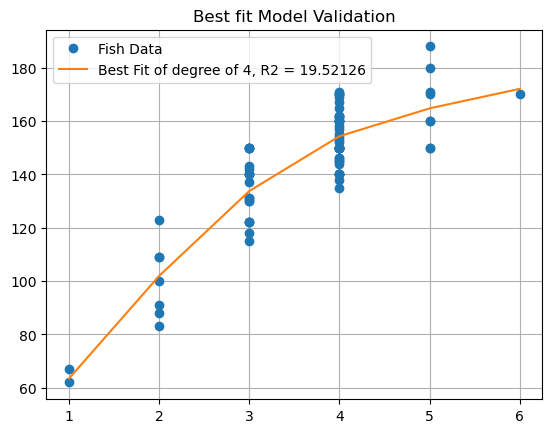

In [19]:
def rmse(y, estimated):
    """
    Calculate the root mean square error term.

    Args:
        y: an 1-d numpy array with length N, representing the y-coordinates of
            the N sample points
        estimated: an 1-d numpy array of values estimated by the regression
            model

    Returns:
        a float for the root mean square error term
    """
    #do not change
    return np.sqrt(sum((y-estimated)**2)/len(y))

y_estiments = []
for f in range(numSubsets):
    '''10 rsquare values for each degree'''
    trainX, trainY, testX, testY = splitData(xVal, yVal)
    for d in dimensions:
        model = np.polyfit(trainX, trainY, d) # model for each degree
        estYvals = np.polyval(model, testX)
        rSquares[d].append(rmse(testY, estYvals)) #Replace rSquared with rmse()
        error = rmse(testY, estYvals)
        y_estiments.append(estYvals)


means = []
for d in dimensions: # average each rsquared value
    mean = round(sum(rSquares[d])/len(rSquares[d]),4) #check the Rsquare model
    means.append(mean)
    sd = round(np.std(rSquares[d]),4)
    print('For dimensionality', d, 'mean =', mean, 'std =', sd)

print(np.argmax(means)+1)
print(means)
best_rSquare = (np.argmax(means)+1)
plt.plot(xVal, yVal, 'o', label = "Fish Data")
model = np.polyfit(xVal, yVal, best_rSquare) #best fit according to test models
estYvals = np.polyval(model, xVal)
plt.plot(xVal, estYvals, label = 'Best Fit of degree of '\
        + str(best_rSquare) + ', R2 = '\
        + str(round(error,5)))

plt.grid(True)
plt.legend(loc = 'best')
plt.title('Best fit Model Validation')
plt.show()


#### Evaluation:
* When applying the rsme function in place of the rSquare function, both evaluations agree that that model one with a linear line is the best fit model for this Fish data. rSquare model had a mean of 2.3137 while the Root Mean Square Error had a mean of 2.667. Not much of a deviation. 